<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#회귀 실습- 자전거 대여 수요 예측

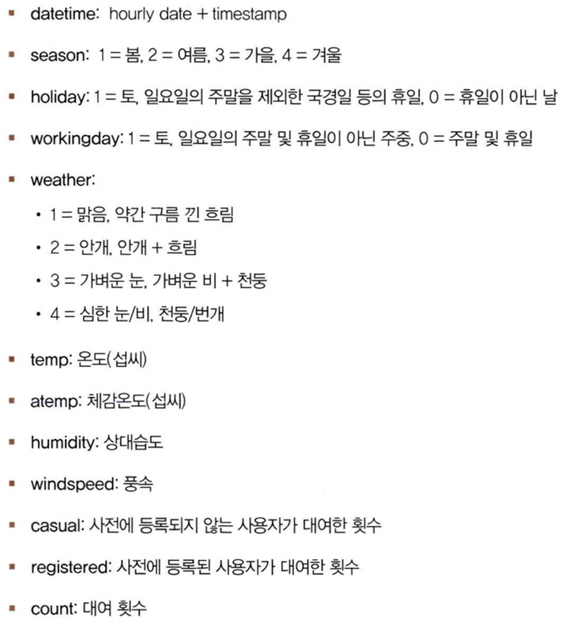

##데이터 클렌징 및 가공과 데이터 시각화

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)

bike_df=pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head()


(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [62]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [63]:
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)

bike_df['year']=bike_df.datetime.apply(lambda x: x.year)
bike_df['month']=bike_df.datetime.apply(lambda x: x.month)
bike_df['day']=bike_df.datetime.apply(lambda x: x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [64]:
#casual+registered=count이므로 상관도 높아 제거

drop_columns=['datetime','casual','registered']
bike_df.drop(drop_columns,axis=1,inplace=True)

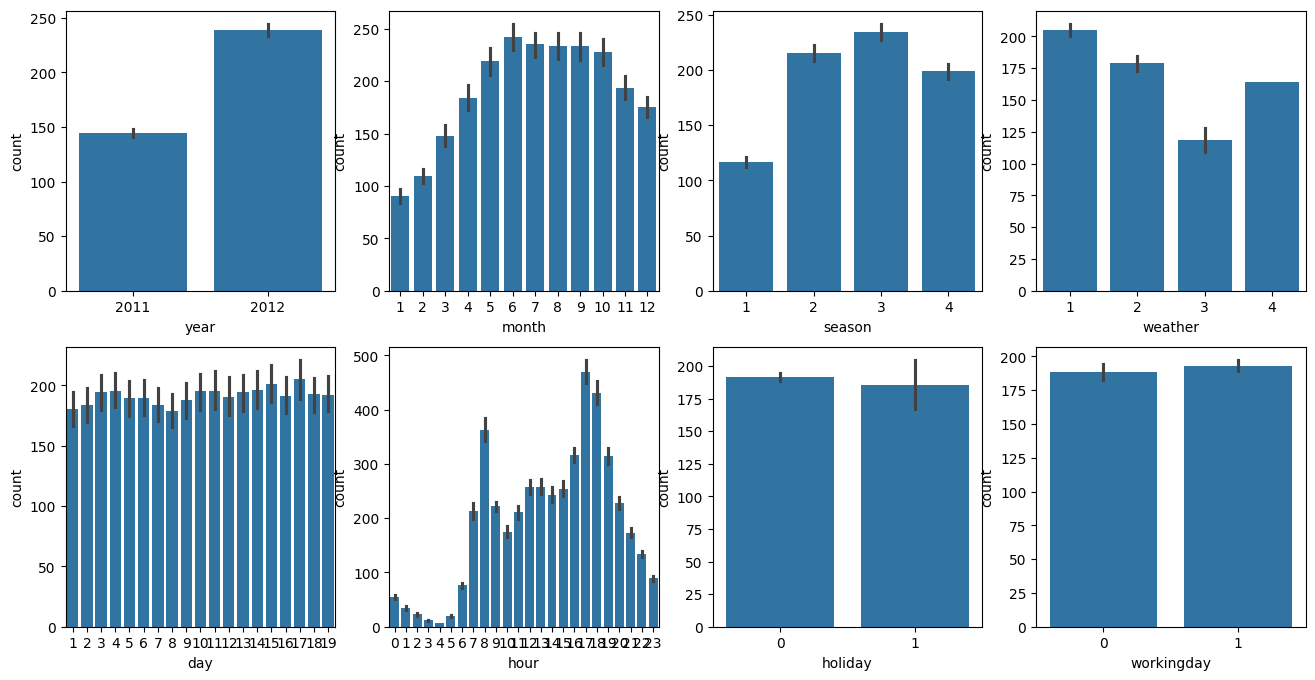

In [66]:
#주요 칼럼별로 타겟 값 어떻게 분포하는지 시각화

fig, axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
cat_features=['year','month','season','weather','day','hour','holiday','workingday']
for i,feature in enumerate(cat_features):
  row=int(i/4)
  col=i%4
  sns.barplot(x=feature,y='count',data=bike_df,ax=axs[row][col])

year（년도）별 count를 보면 2012년이 2011 년보다 상대적으로 값이 높습니다. 이는 year 자체가 특별
한 의미가 있어서라기보다는 시간이 지날수록 자전거 대여 횟수가 지속적으로 증가한 결과라고 여겨질
수 있습니다. month（월별）의 경우 1, 2, 3월이 낮고, 6, 7, 8, 9월이 높습니다. 또한 season（계절）을
보면 봄⑴, 겨울⑷이 낮고, 여름（2）, 가을（3）이 높습니다. weather（날씨）의 경우는 눈 또는 비가 있는
경우（3과 4）가 낮고, 맑거나（1） 약간 안개가 있는 경우（2）가 높습니다.
 hour（시간）의 경우는 오전 출근 시간（8）과 오후 퇴근 시간（17, 18）이 상대적으로 높습니다. day（일
자）간의 차이는 크지 않으며, holiday（휴일 여부） 또는 workingday（주중 여부）는 주중일 경우（즉
holiday는 0, workingday는 1）가 상대적으로 약간 높습니다

성능 평가 함수

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
  log_y=np.log1p(y)
  log_pred=np.log1p(pred)
  squared_error=(log_y-log_pred)**2
  rmsle=np.sqrt(np.mean(squared_error))
  return rmsle
def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))
def evaluate_regr(y,pred):
  rmsle_val=rmsle(y,pred)
  rmse_val=rmse(y,pred)

  mae_val=mean_absolute_error(y,pred)
  print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val,rmse_val,mae_val))


In [ ]:
#주의 log1p말고 log사용시 오버플로/언더플로 문제 발생 가능
#예시
def rmsle(y,pred):
  msle=mean_squared_log_error(y,pred)
  rmsle=np.sqrt(mse)
  return rmsle

##로그 변환, 피처 인코딩과 모델 학습/예측/평가

결괏값이 정규분포인지 확인, 카테고리형 회귀 모델의 경우 원핫인코딩으로 피처 인코딩

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target=bike_df['count']
X_features=bike_df.drop(['count'],axis=1,inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)
evaluate_regr(y_test,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [72]:
#오류값 가장 큰 순 5개 확인
def get_top_error_data(y_test,pred,n_tops=5):
  result_df=pd.DataFrame(y_test.values,columns=['real_count'])
  result_df['predicted_count']=np.round(pred)
  result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
  print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
966          884            327.0  557.0
3151         798            241.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


예측 오류가 꽤 큼,

가장 먼저 타겟 값의 분포가 왜곡된 형태를 이루고 있는지 확인하기

<Axes: >

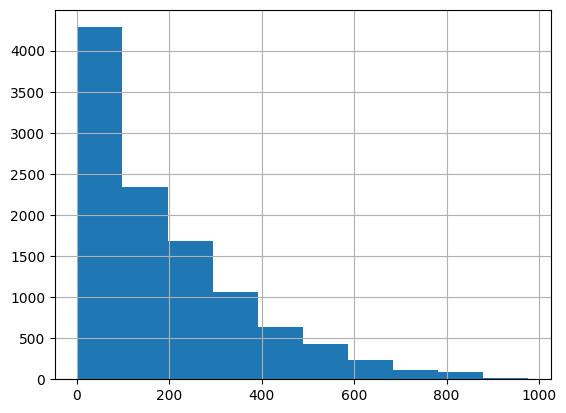

In [73]:
y_target.hist()

정규 분포가 아닌 0-200사이 왜곡 형태> 로그 변환

<Axes: >

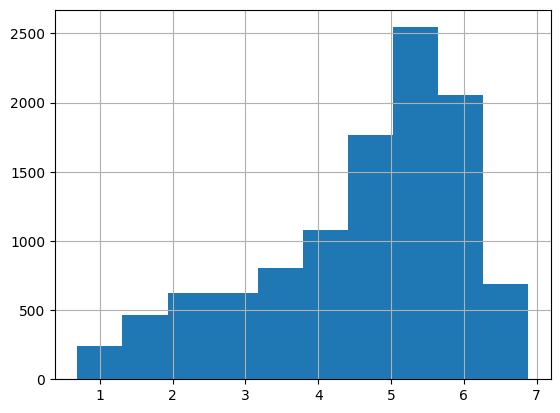

In [74]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

정규분포는 아니지만 왜곡 정도 향상

In [76]:
y_target_log=np.log1p(y_target)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target_log,test_size=0.3,random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

y_test_exp=np.expm1(y_test)
pred_exp=np.expm1(pred)
evaluate_regr(y_test_exp,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


RMSLE감소했으나 RMSE증가

개별 피처 인코딩 적용

<Axes: ylabel='None'>

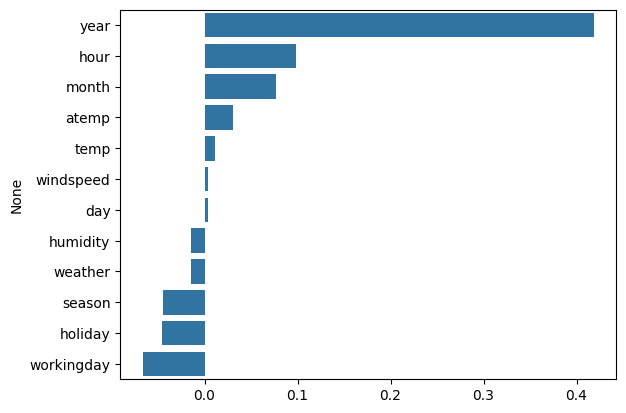

In [77]:
coef=pd.Series(lr_reg.coef_,index=X_features.columns)
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

year,hour,month등은 숫자로 표현되었지만 카테고리형 피처> 원핫인코딩 적용해 변환해야함

In [82]:
X_features_ohe=pd.get_dummies(X_features,columns=['year', 'month', 'day', 'hour',
                                         'holiday', 'workingday', 'season', 'weather'])


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_features_ohe,y_target_log,test_size=0.3,random_state=0)


def get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=False):
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  if is_expm1:
    y_test=np.expm1(y_test)
    pred=np.expm1(pred)
  print('###',model.__class__.__name__,'###')
  evaluate_regr(y_test,pred)

lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg,lasso_reg]:
  get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


성능 많이 향상

다시 회귀 계수 높은 피처 시각화

<Axes: ylabel='None'>

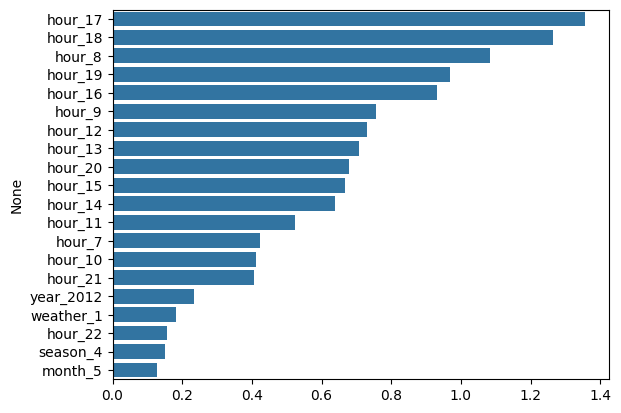

In [84]:
coef=pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

책이랑 완전 다른데 왜지...?

In [86]:
#회귀 트리 이용해 예측 수행
#XGBoost는 DF가 입력될경우 오류가 발생할 수 있어 ndarray로 변환

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg=RandomForestRegressor(n_estimators=500)
gbm_reg=GradientBoostingRegressor(n_estimators=500)
xgbm_reg=XGBRegressor(n_estimators=500)
lgbm_reg=LGBMRegressor(n_estimators=500)

for model in [rf_reg,gbm_reg,xgbm_reg,lgbm_reg]:
  get_model_predict(model,X_train.values,X_test.values,y_train.values,y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.121, MAE: 31.028
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.348, MAE: 32.751
### XGBRegressor ###
RMSLE: 0.339, RMSE: 51.475, MAE: 31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


회귀 예측 성능 개선

데이터 세트 유형에 따라 달라짐

# 10 회귀 실습- 캐글 주택 가격: 고급 회귀 기법

##데이터 사전처리



In [17]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org=pd.read_csv('house_price.csv')
house_df=house_df_org.copy()
house_df_org.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [14]:
print('데이터 세트의 shape: ',house_df.shape)
print('데이터 세트의 type: ',house_df.dtypes.value_counts())
isnull_series=house_df.isnull().sum()
print('\n Null칼럼과 그 건수:',isnull_series[isnull_series>0].sort_values(ascending=False))

데이터 세트의 shape:  (1460, 81)
데이터 세트의 type:  object     43
int64      35
float64     3
Name: count, dtype: int64

 Null칼럼과 그 건수: PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


Null많은 피처 드롭

타깃 값 정규 분포인지 확인

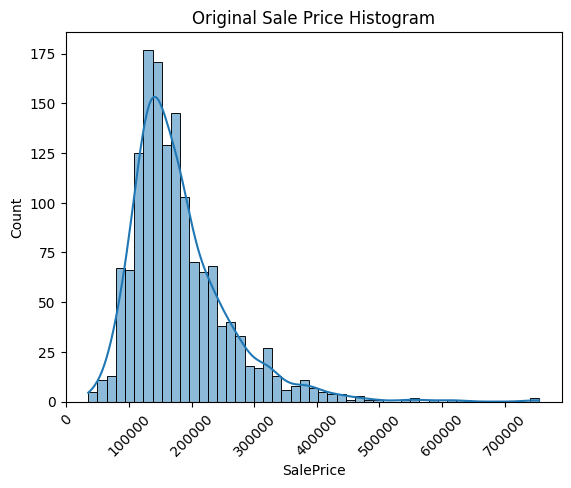

In [8]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'],kde=True)
plt.show()

정규분포가 아니므로 로그 변환

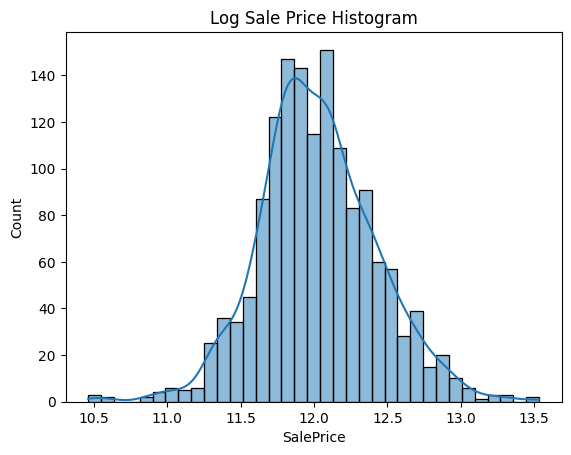

In [15]:
plt.title('Log Sale Price Histogram')
log_SalePrice=np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice,kde=True)
plt.show()

정규분포 형태로 결괏값 분포
Null값 많은 피처 및 ID삭제
다른 Null값은 평균값으로 대체

In [18]:
original_SalePrice=house_df['SalePrice']
house_df['SalePrice']=np.log1p(house_df['SalePrice'])

house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

numerical_cols = house_df.select_dtypes(include=np.number).columns

house_df[numerical_cols] = house_df[numerical_cols].fillna(house_df[numerical_cols].mean())

null_column_count=house_df.isnull().sum()[house_df.isnull().sum()>0]
print('##Null피처의 타입: \n',house_df.dtypes[null_column_count.index])

##Null피처의 타입: 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


문자형 피처 원핫인코딩
> 원핫인코딩은 Null의 경우 모든 값이 0이 되므로 따로 처리X

In [21]:
print('get_dummies()수행 전 데이터 shape: ',house_df.shape)
house_df_ohe=pd.get_dummies(house_df)
print('get_dummies()수행 후 데이터 shape: ', house_df_ohe.shape)

null_column_count=house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]
print('##NUll피처의 타입: \n',house_df_ohe.dtypes[null_column_count.index])

get_dummies()수행 전 데이터 shape:  (1460, 75)
get_dummies()수행 후 데이터 shape:  (1460, 270)
##NUll피처의 타입: 
 Series([], dtype: object)


#선형 회귀 모델 학습/예측/평가

로그변환을 했으므로 예측 결과 오류에 RMSE적용시 RMSLE 자동 측정

RMSE측정 계산 함수 생성

In [22]:
def get_rmse(model):
  pred=model.predict(X_test)
  mse=mean_squared_error(y_test,pred)
  rmse=np.sqrt(mse)
  print(model.__class__.__name__,'로그 변환된 rmse: ', np.round(rmse, 3))
  return rmse

In [23]:
def get_rmses(models):
  rmses=[]
  for model in models:
    rmse=get_rmse(model)
    rmses.append(rmse)
  return rmses

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target=house_df_ohe['SalePrice']
X_features=house_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=156)


lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 rmse:  0.132
Ridge 로그 변환된 rmse:  0.127
Lasso 로그 변환된 rmse:  0.176


[np.float64(0.13183184688250701),
 np.float64(0.1274058283626616),
 np.float64(0.17628250556471403)]

lasso의 하이퍼 파라미터 튜닝이 필요해 보임

먼저 상하위 각 10개 회귀 계수값 확인 및 회귀계수 Series객체 반환함수

In [25]:
def get_top_bottom_coef(model,n=10):
  coef=pd.Series(model.coef_,index=X_features.columns)
  coef_high=coef.sort_values(ascending=False).head(n)
  coef_low=coef.sort_values(ascending=False).tail(n)
  return coef_high, coef_low

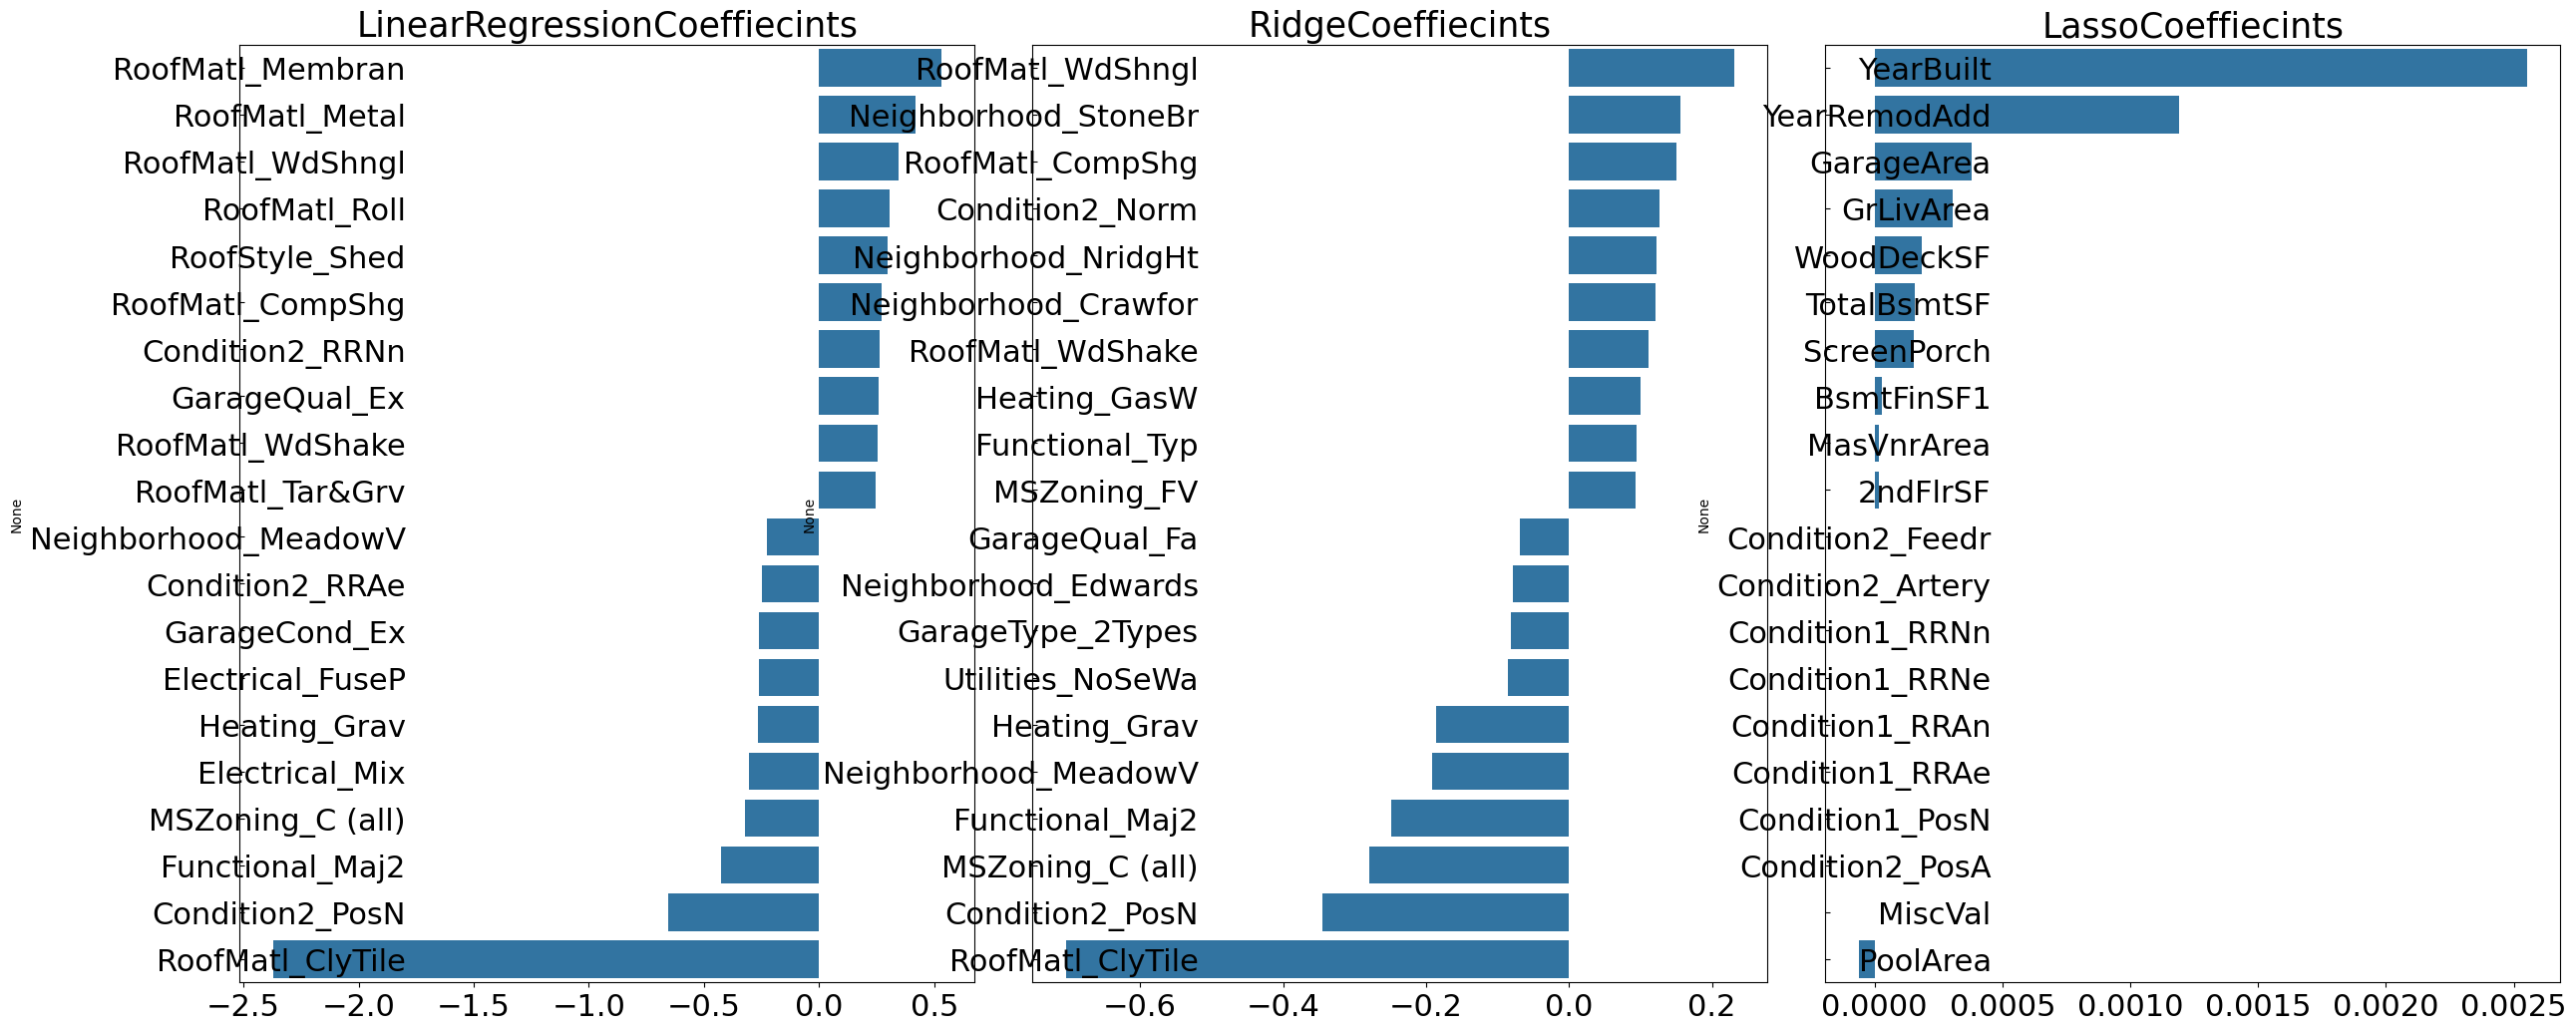

In [32]:
#모델별 회귀계수 시각화 함수
def visualize_coefficient(models):
  fig,axs=plt.subplots(figsize=(24,10),nrows=1,ncols=3)
  fig.tight_layout()
  for i_num,model in enumerate(models):
    coef_high, coef_low=get_top_bottom_coef(model)
    coef_concat=pd.concat([coef_high,coef_low])
    axs[i_num].set_title(model.__class__.__name__+'Coeffiecints',size=25)
    axs[i_num].tick_params(axis='y',direction='in',pad=-120)
    for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
      label.set_fontsize(22)
    sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])


models=[lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)



라쏘의 회귀계수 값이 yearbulit거 매우 크고 나머지는 전체적으로 작음

데이터 분할의 문제일 수 있어 학습훈련 데이터 나누지 않고 교차검증

In [33]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
  for model in models:
    rmse_list=np.sqrt(-cross_val_score(model,X_features,y_target,scoring='neg_mean_squared_error',cv=5))
    rmse_avg=np.mean(rmse_list)
    print('\n{0} CV RMSE값 리스트: {1}'.format(model.__class__.__name__,np.round(rmse_list,3)))
    print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))

models=[ridge_reg,lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


여전히 라쏘의 성능 떨어짐
두 모델에 대해 알파 하이퍼 파라미터 변화하며 최적 값 도출


In [34]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
  grid_model=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
  grid_model.fit(X_features,y_target)
  rmse=np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV시 최적 평균 RMSE값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,np.round(rmse,4),grid_model.best_params_))

ridge_params={'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV시 최적 평균 RMSE값:0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV시 최적 평균 RMSE값:0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 rmse:  0.132
Ridge 로그 변환된 rmse:  0.124
Lasso 로그 변환된 rmse:  0.12


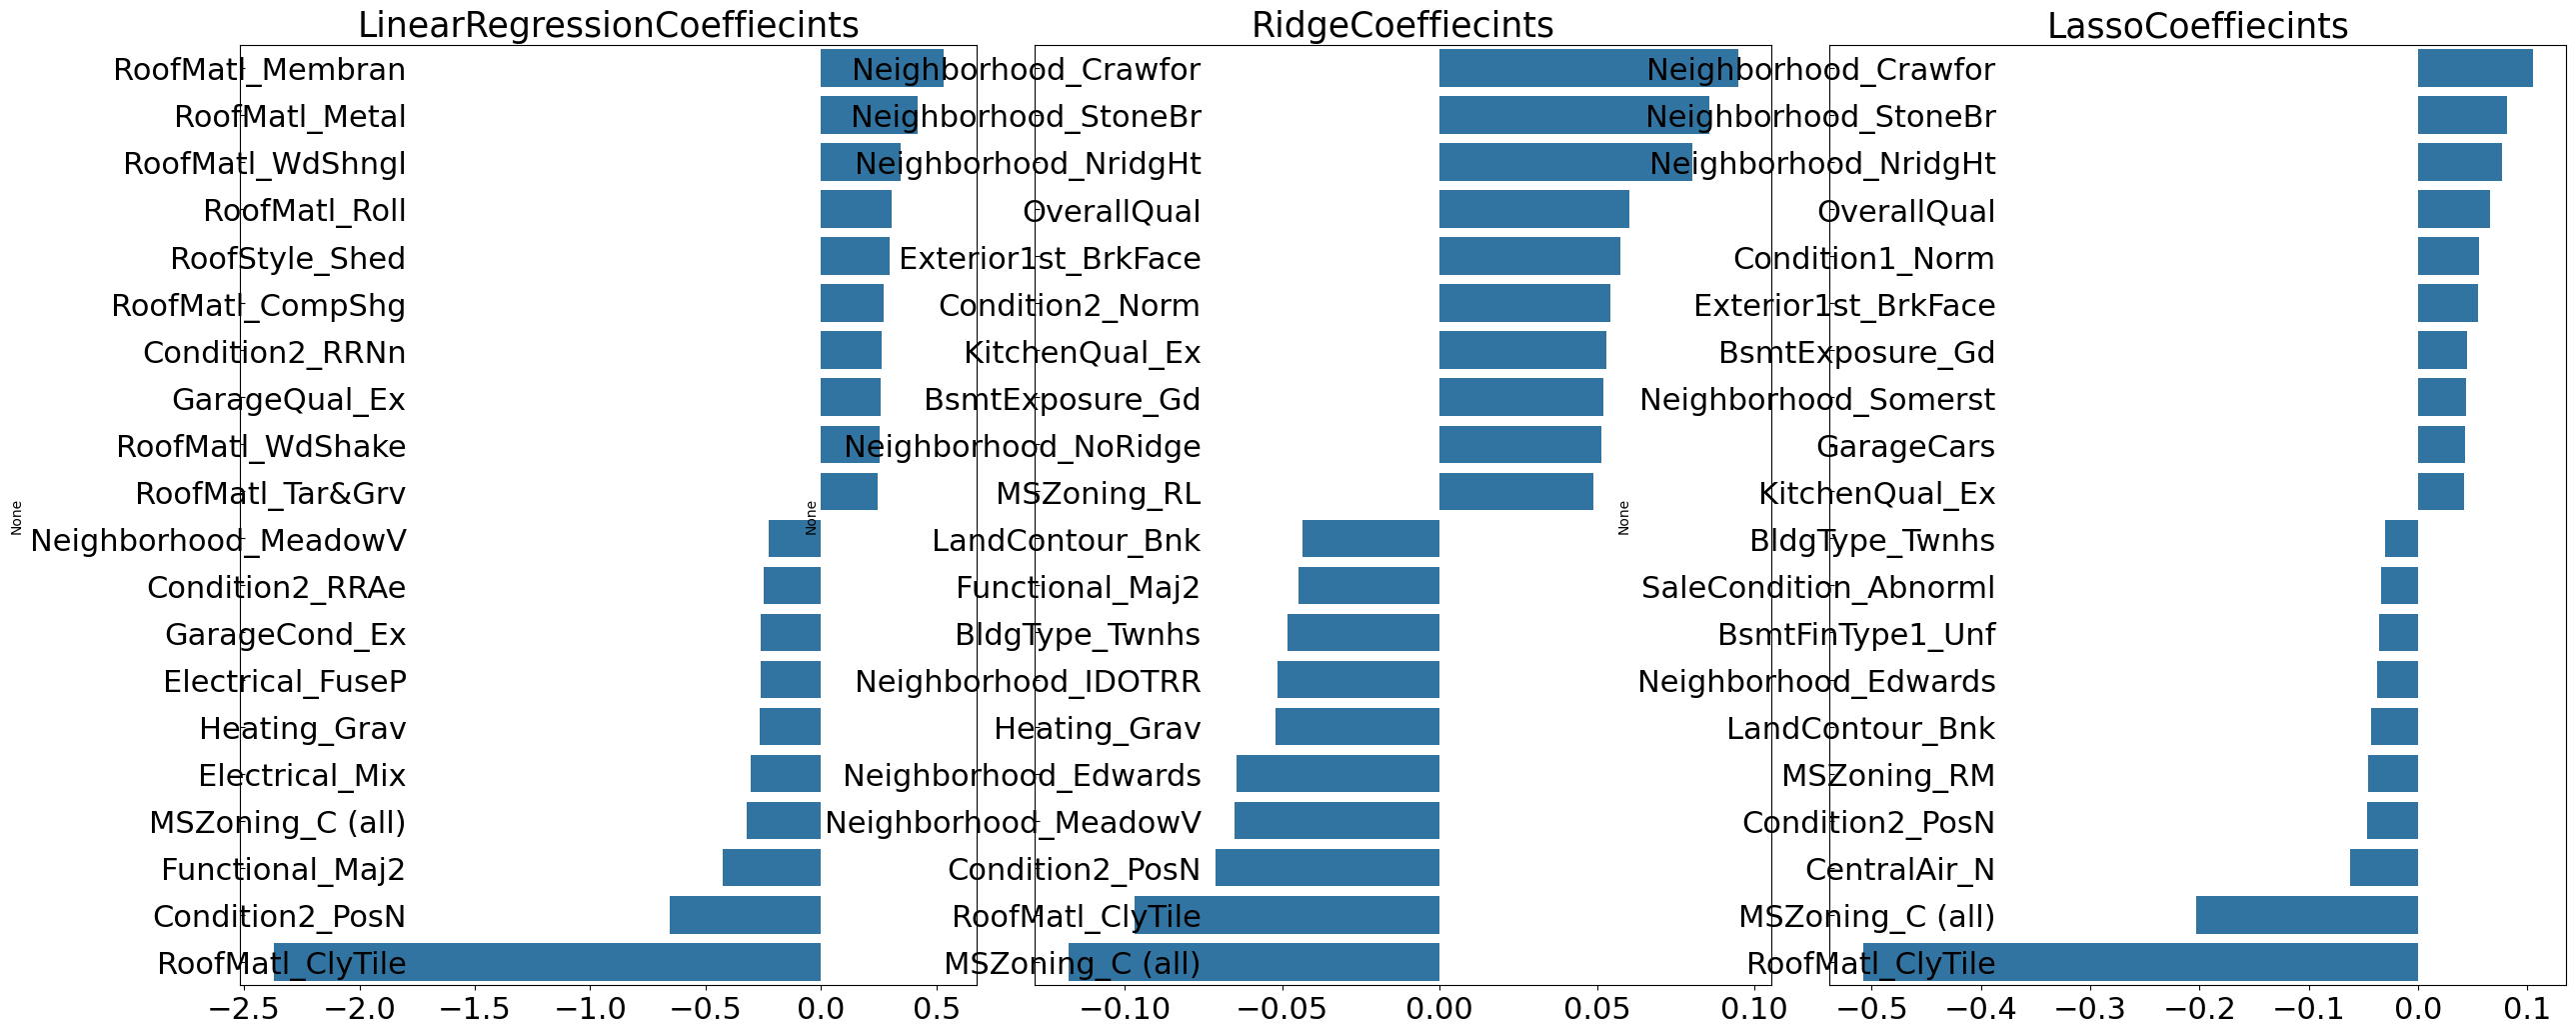

In [37]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=12)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

visualize_coefficient(models)

라쏘모델 나머지 모델과 차이 많지만 릿지와 라쏘 모델에서 비슷한 피처의 회귀계수가 높음

다만 라쏘모델의 경우 릿지에 비해 동일한 피처라도 회귀 계수의 값이 상당히 작음

데이터 세트를 추가적으로 가공해 모델 튜닝 진행

1. 데이터 분포도: 지나치게 왜곡된 피처의 경우 회귀 예측 성능 저하> 사이파이 stats 모듈 skew()함수로 왜곡정도 추출 가능(보통 1 이상일 때 높다고 판단)
* 이때 원핫 인코딩된 피처 제외해야함
2. 이상치 데이터 처리

In [38]:
from scipy.stats import skew

features_index=house_df.dtypes[house_df.dtypes!='object'].index

skew_features=house_df[features_index].apply(lambda x:skew(x))

skew_features_top=skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


왜곡도 높은 피처만 로그처리 후 다시 원핫인코딩

In [41]:
house_df[skew_features_top.index]=np.log1p(house_df[skew_features_top.index])


In [43]:
house_df_ohe=pd.get_dummies(house_df)
y_target=house_df_ohe['SalePrice']
X_features=house_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=156)

ridge_params={'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV시 최적 평균 RMSE값:0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV시 최적 평균 RMSE값:0.1252, 최적 alpha:{'alpha': 0.001}


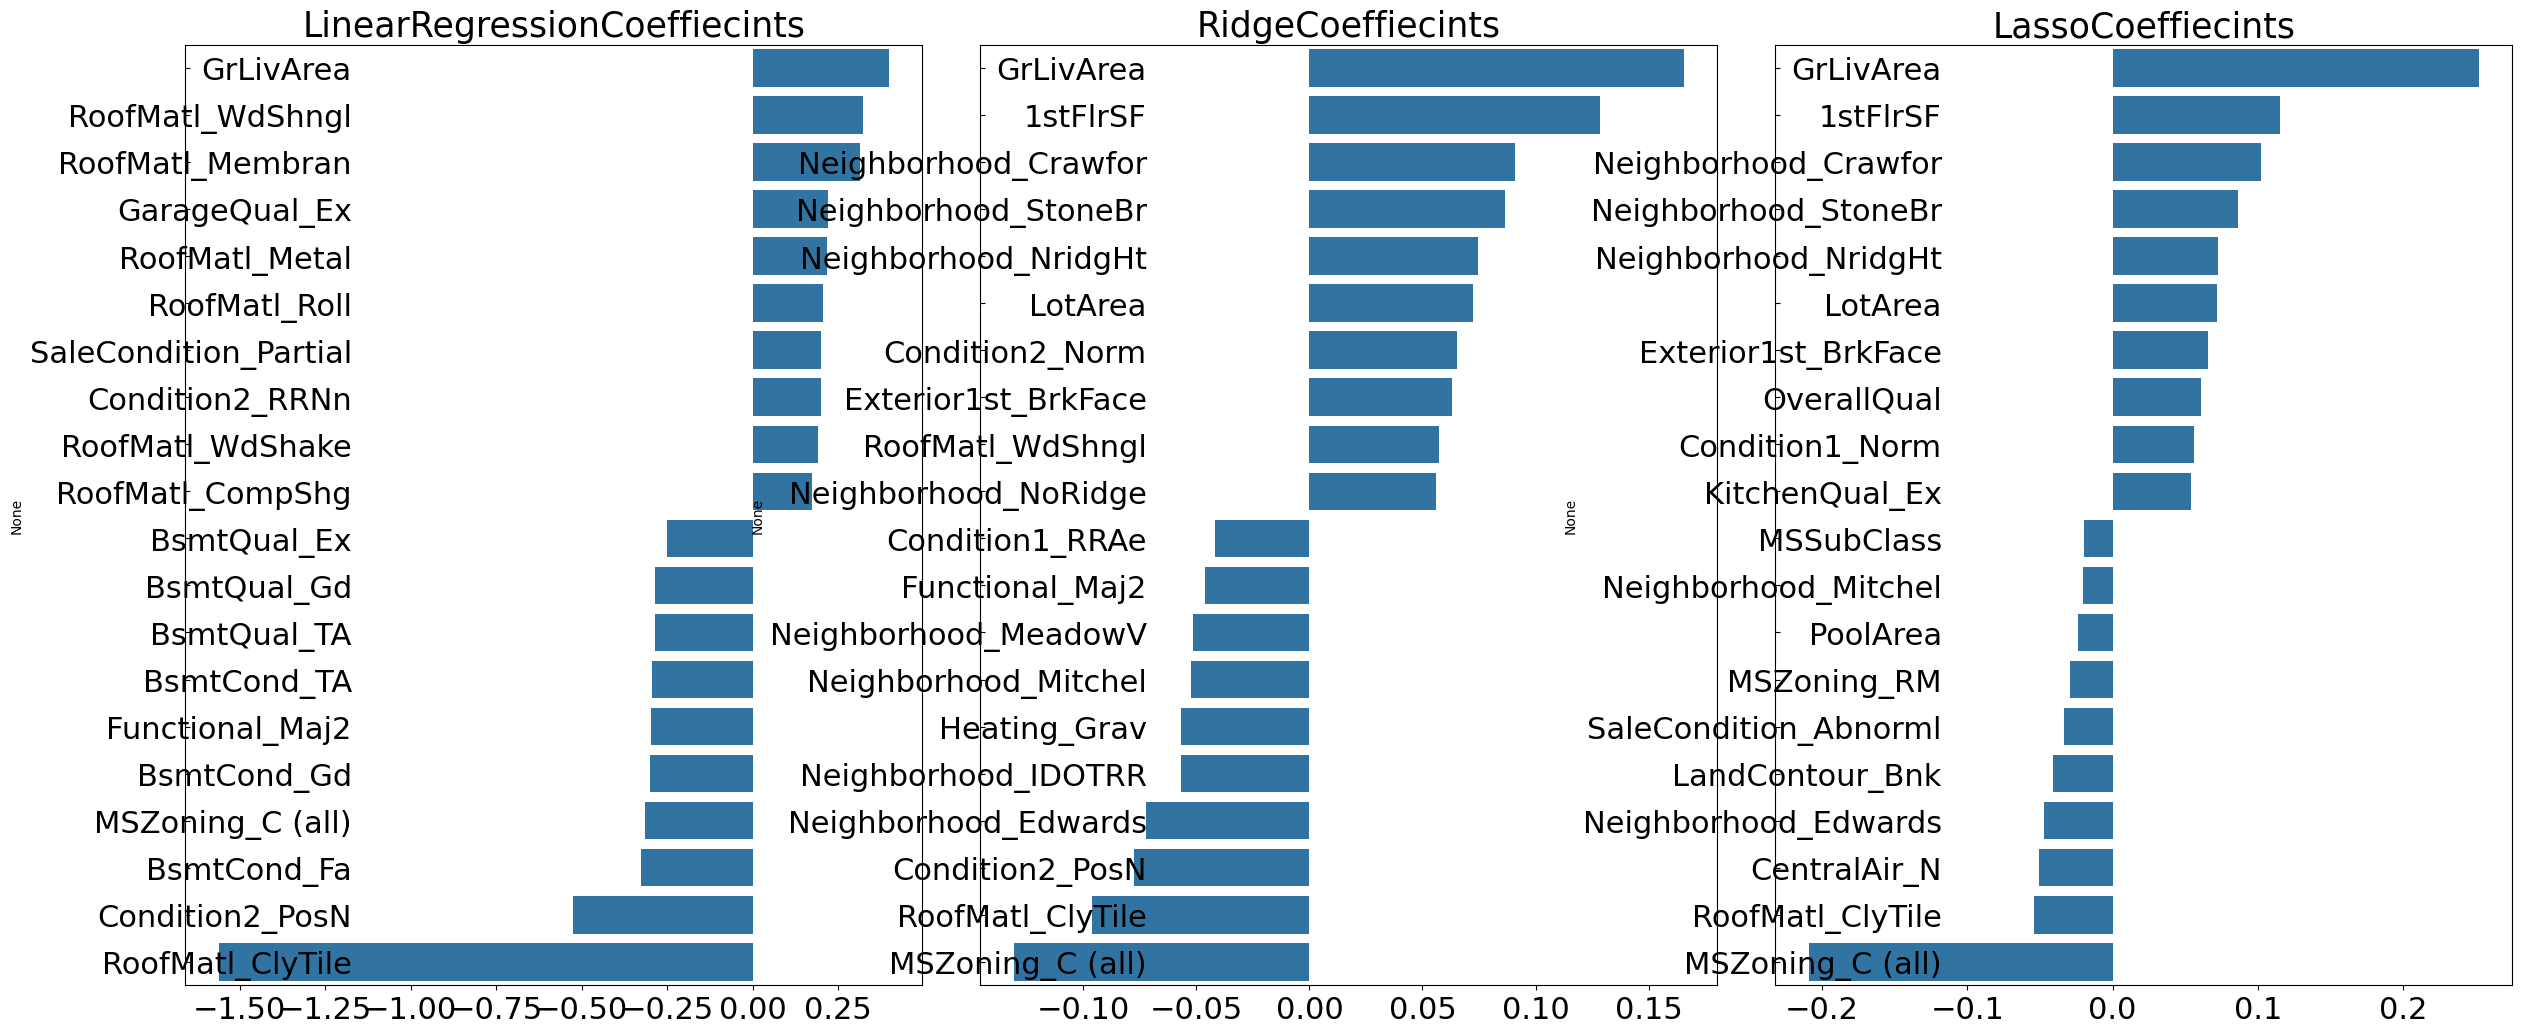

In [44]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]

visualize_coefficient(models)

세 모델 모두 GrLivArea 즉 주거공간이 회귀 계수가 가장 높은, 주거공간 크기가 주택가격에 미치는 영향이 당연히 제일 높을 것이라는 상식선의 결과가 이제야 도출

2. 이상치 데이터

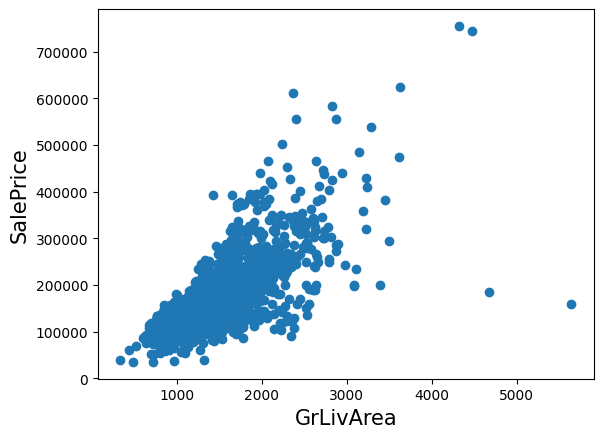

In [45]:
plt.scatter(x=house_df_org['GrLivArea'],y=house_df_org['SalePrice'])
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea',fontsize=15)
plt.show()

두개의 이상치 제거

두 변수 모두 로그 처리되어있으므로 이를 반영하여 제거

In [46]:
cond1=house_df_ohe['GrLivArea']>np.log1p(4000)
cond2=house_df_ohe['SalePrice']<np.log1p(500000)
outlier_index=house_df_ohe[cond1&cond2].index

print('이상치 레코드 index: ',outlier_index)
print('이상치 삭제 전 house_df_ohe shape: ',house_df_ohe.shape)
house_df_ohe.drop(outlier_index,axis=0,inplace=True)
print('이상치 삭제 후 house_df_ohe shape: ',house_df_ohe.shape)

이상치 레코드 index:  Index([523, 1298], dtype='int64')
이상치 삭제 전 house_df_ohe shape:  (1460, 270)
이상치 삭제 후 house_df_ohe shape:  (1458, 270)


In [48]:
y_target=house_df_ohe['SalePrice']
X_features=house_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=156)

ridge_params={'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV시 최적 평균 RMSE값:0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE값:0.1122, 최적 alpha:{'alpha': 0.001}


성능 매우 향상

웬만한 하이퍼 파라미터 튜닝보다 성능 좋아짐  
회귀에 중요한 영향을 끼치는 피처를 위주로 이상치 데이터를 찾으려는 노력은 중요

LinearRegression 로그 변환된 rmse:  0.129
Ridge 로그 변환된 rmse:  0.103
Lasso 로그 변환된 rmse:  0.1


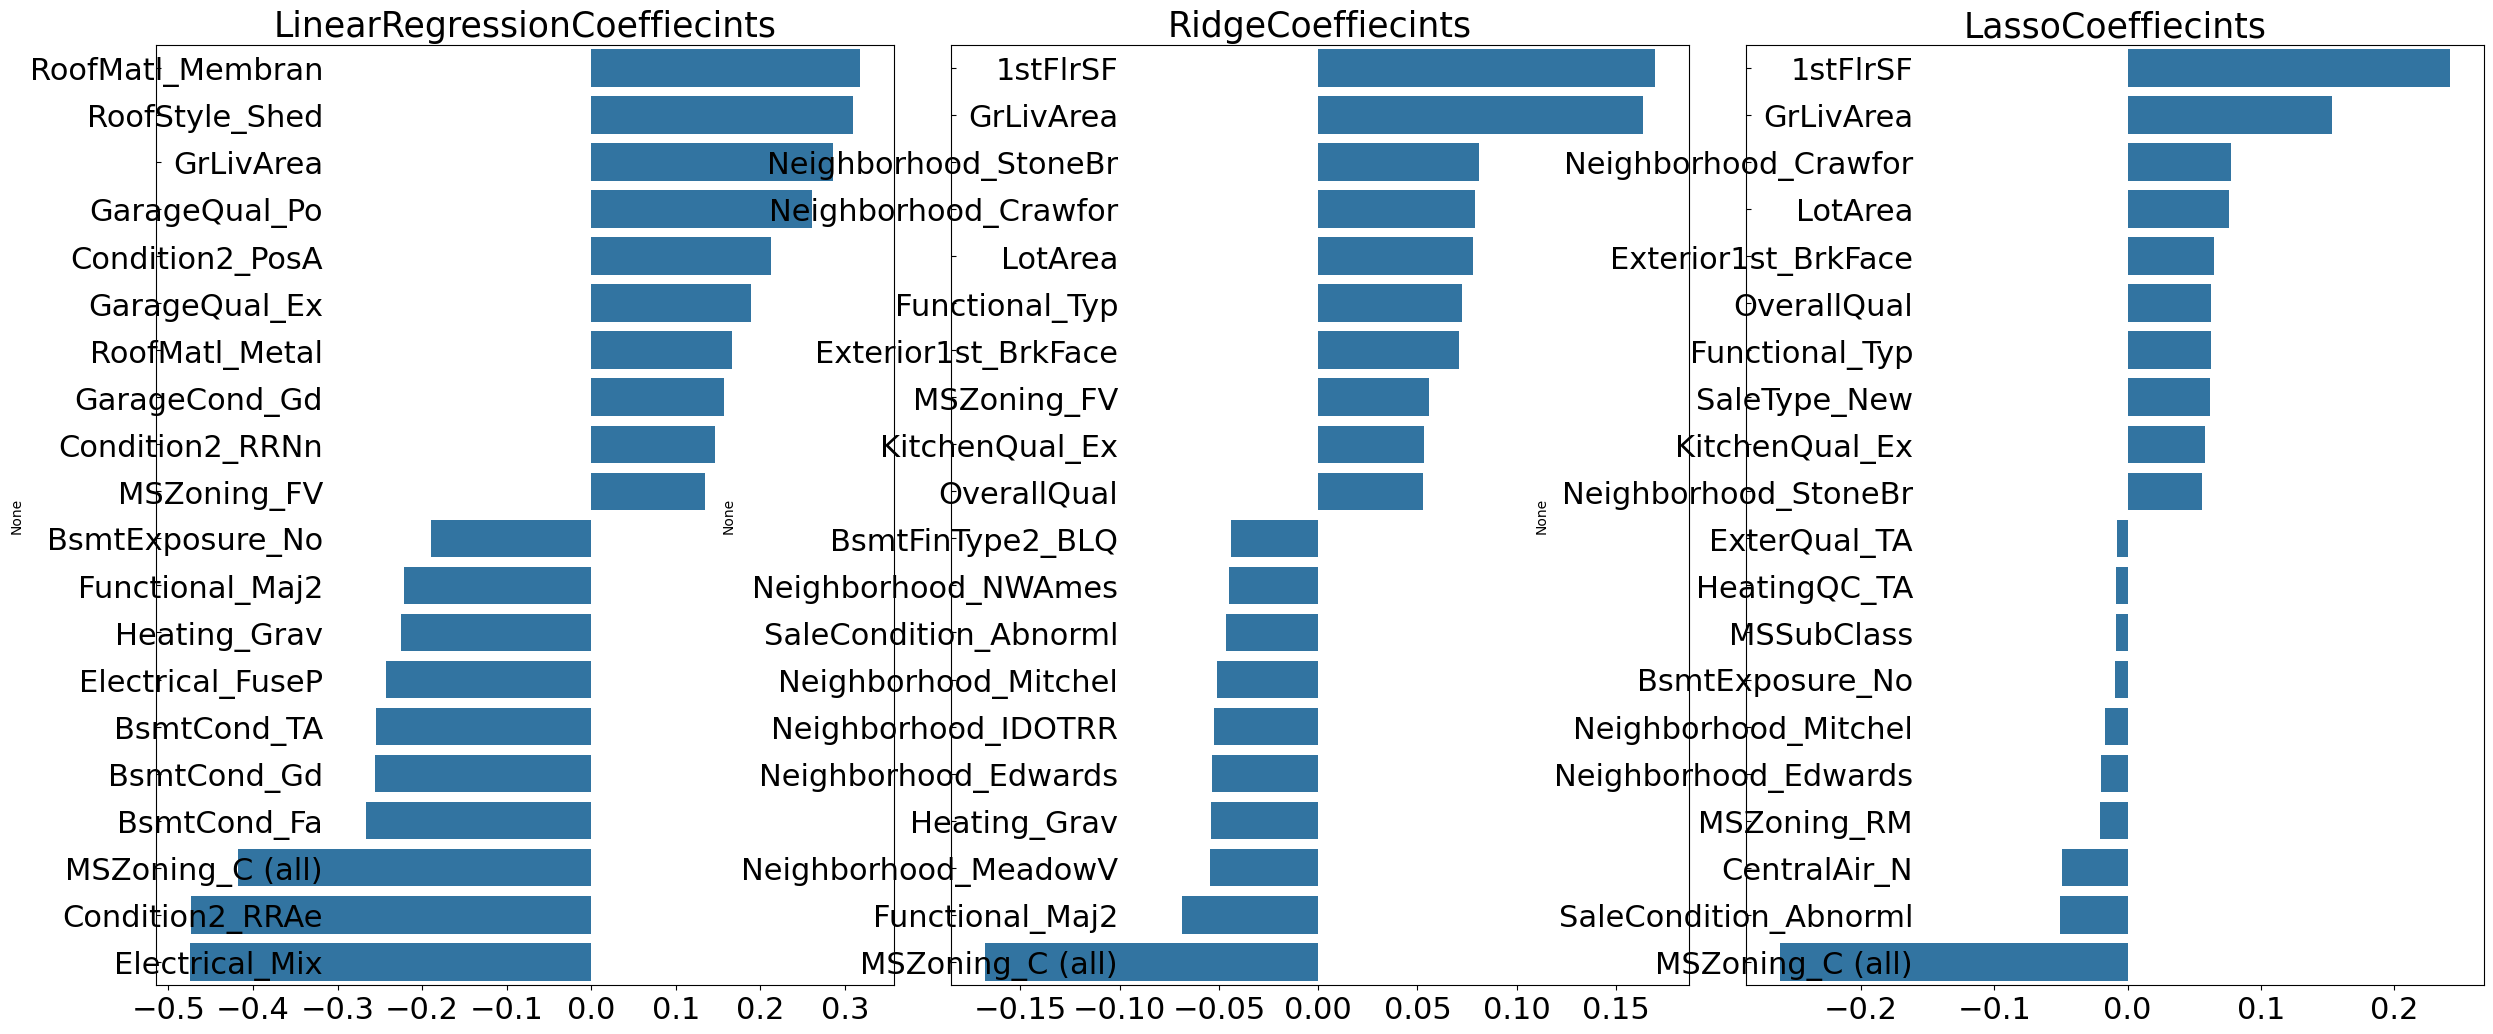

In [51]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=8)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)
visualize_coefficient(models)

##회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [52]:
#개별 모델의 RMSE값 출력하는 함수 생성

def get_rmse_pred(preds):
  for key in preds.keys():
    pred_value=preds[key]
    mse=mean_squared_error(y_test,pred_value)
    rmse=np.sqrt(mse)
    print('{0}모델의 RMSE: {1}'.format(key,rmse))

ridge_reg=Ridge(alpha=8)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

ridge_pred=ridge_reg.predict(X_test)
lasso_pred=lasso_reg.predict(X_test)

pred=0.4*ridge_pred+0.6*lasso_pred
preds={'최종 혼합':pred, 'Ridge': ridge_pred,'Lasso':lasso_pred}

get_rmse_pred(preds)


최종 혼합모델의 RMSE: 0.10006075517615193
Ridge모델의 RMSE: 0.10340697165289348
Lasso모델의 RMSE: 0.10024171179335342


In [53]:
#가중치 정하는 특별한 기준 없음 성능 좋은것up
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
xgb_reg=XGBRegressor(n_estimators=1000,learning_rate=0.05,colsample_bytree=0.5,subsample=0.8)
xgb_reg.fit(X_train,y_train)
lgbm_reg=LGBMRegressor(n_estimators=1000,learning_rate=0.05,
                       num_leaves=4,subsample=0.6,colsample_bytree=0.4,reg_lambda=10,n_jobs=-1)
lgbm_reg.fit(X_train,y_train)
xgb_pred=xgb_reg.predict(X_test)
lgbm_pred=lgbm_reg.predict(X_test)

pred=0.5*xgb_pred+0.5*lgbm_pred
preds={'최종 혼합':pred,
       'XGBM':xgb_pred,
       'LGBM':lgbm_pred}
get_rmse_pred(preds)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3174
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 172
[LightGBM] [Info] Start training from score 12.025343
최종 혼합모델의 RMSE: 0.10215383402419025
XGBM모델의 RMSE: 0.10761344291735733
LGBM모델의 RMSE: 0.10363891833477148


##스태킹 앙상블 모델을 통한 회귀 예측





In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model,X_train_n,y_train_n,X_test_n,n_folds):
  kf=KFold(n_splits=n_folds,shuffle=False)
  train_fold_pred=np.zeros((X_train_n.shape[0],1))
  test_pred=np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__,'model 시작')
  for folder_counter,(train_index,valid_index) in enumerate(kf.split(X_train_n)):
    print('\t 폴드 세트: ',folder_counter,'시작')
    X_tr=X_train_n[train_index]
    y_tr=y_train_n[train_index]
    X_te=X_train_n[valid_index]
    model.fit(X_tr,y_tr)
    train_fold_pred[valid_index,:]=model.predict(X_te).reshape(-1,1)
    test_pred[:,folder_counter]=model.predict(X_test_n)
  test_pred_mean=np.mean(test_pred,axis=1).reshape(-1,1)
   # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean


In [55]:
 # get_stacking_base_datasets( )는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환
X_train_n=X_train.values
X_test_n=X_test.values
y_train_n=y_train.values


ridge_train, ridge_test=get_stacking_base_datasets(ridge_reg,X_train_n,y_train_n,X_test_n,5)
lasso_train, lasso_test=get_stacking_base_datasets(lasso_reg,X_train_n,y_train_n,X_test_n,5)
xgb_train, xgb_test=get_stacking_base_datasets(xgb_reg,X_train_n,y_train_n,X_test_n,5)
lgbm_train, lgbm_test=get_stacking_base_datasets(lgbm_reg,X_train_n,y_train_n,X_test_n,5)

Ridge model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
Lasso model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
XGBRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
LGBMRegressor model 시작
	 폴드 세트:  0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.251563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2924
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 156
[LightGBM] [Info] Start training from score 12.035561
	 폴드 세트:  1 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2951
[Lig

In [56]:
Stack_final_X_train=np.concatenate((ridge_train,lasso_train,xgb_train,lgbm_train),axis=1)
Stack_final_X_test=np.concatenate((ridge_test,lasso_test,xgb_test,lgbm_test),axis=1)

meta_model_lasso=Lasso(alpha=0.0005)

meta_model_lasso.fit(Stack_final_X_train,y_train)
final=meta_model_lasso.predict(Stack_final_X_test)

mse=mean_squared_error(y_test,final)
rmse=np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:',rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09704503149148055
